<a href="https://colab.research.google.com/github/majavk/Data_Science_Portfolio/blob/main/Copy_of_MVK__Exercise_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#                                     ________  _______  _________  ___  ___  ________   
#                                    |\   ____\|\  ___ \|\___   ___\\  \|\  \|\   __  \  
#                                    \ \  \___|\ \   __/\|___ \  \_\ \  \\\  \ \  \|\  \ 
#                                     \ \_____  \ \  \_|/__  \ \  \ \ \  \\\  \ \   ____\
#                                      \|____|\  \ \  \_|\ \  \ \  \ \ \  \\\  \ \  \___|
#                                        ____\_\  \ \_______\  \ \__\ \ \_______\ \__\   
#                                       |\_________\|_______|   \|__|  \|_______|\|__|   
#                                       \|_________|                                     


# Import of libraries and access of Colab to Google account

from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

# import libraries
#input DATA

import numpy as np            #for manipulating vectors
import pandas as pd           #per manipulating dataframes

# graphs, figures

import matplotlib.pyplot as plt #for plots
import seaborn as sns # for confusion matrix figures

#machine learning tools

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier        # ensemble machine learning model with bagging
import xgboost as xgb      # import XGBoostClassifier, ensemble machine learning model with boosting 
from sklearn.svm import SVC #support vector machines
from sklearn.neural_network import MLPClassifier # neural network
from sklearn.decomposition import PCA

from sklearn import feature_selection #various feature selection
import collections
from imblearn.over_sampling import SMOTE # SMOTE oversampling

# tools for assessing the model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc # tools to evaluate  your model performance
from sklearn.model_selection import train_test_split, cross_val_score, KFold,cross_val_predict, GridSearchCV   # other tools for model performance, specific for cross-validation
from sklearn.model_selection import cross_val_score
import time





In [ ]:
#
#                                     _____                  _         _       _        
#                                    |_   _|                | |       | |     | |       
#                                      | | _ __  _ __  _   _| |_    __| | __ _| |_ __
#                                      | || '_ \| '_ \| | | | __|  / _` |/ _` | __/ _` |
#                                     _| || | | | |_) | |_| | |_  | (_| | (_| | || (_| |
#                                     \___/_| |_| .__/ \__,_|\__|  \__,_|\__,_|\__\__,_|
#                                               | |                                     
#                                               |_|                                     

#Choice of the dataSET to analyse

#dataset='Wisconsin'            
dataset='HPV'
#dataset='EGFR'

# lettura del set di dati da foglio Google Sheets

sht = gc.open_by_url('https://docs.google.com/spreadsheets/d/1lEOCQHOmD3RXbkS0kQbfZ7oDytiCrLsR_NjGPjYMBbU/edit?usp=sharing')
Wisconsin = sht.worksheet(dataset+'Data');data = pd.DataFrame(Wisconsin.get_all_records())
data = data.fillna(method='ffill') # 
Y = data['outcome']        # outcome
X = data.drop('outcome', axis=1)    # features
np.mean(Y), np.mean(1-Y)

(0.568870523415978, 0.43112947658402206)

In [ ]:
X.shape

(726, 49)

In [ ]:
#split the dataset into train and test datasets and check if your dataset is balanced
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21); print("Train set without SMOTE: ", collections.Counter(Y_train))

sm = SMOTE(random_state=15);stringSMOTE='no'

# line to add SMOTE oversampling, uncomment to apply SMOTE:

X_train, Y_train = sm.fit_resample(X_train, Y_train);print("Train set with SMOTE: ", collections.Counter(Y_train));stringSMOTE='yes'

Train set without SMOTE:  Counter({1: 288, 0: 220})
Train set with SMOTE:  Counter({1: 288, 0: 288})


In [ ]:
collections.Counter(Y_train)

Counter({1: 288, 0: 288})

In [ ]:
X_train.shape

(576, 49)

In [ ]:
#                                       (_) _     _ (_)(_)                                                                (_)               (_)(_)         
#                                       (_)(_)   (_)(_)(_)                       _  _   _  _       _  _  _        _  _  _ (_)   _  _  _  _     (_)         
#                                       (_) (_)_(_) (_)(_)                      (_)(_)_(_)(_)   _ (_)(_)(_) _   _(_)(_)(_)(_)  (_)(_)(_)(_)_   (_)         
#                                       (_)   (_)   (_)(_)                     (_)   (_)   (_) (_)         (_) (_)        (_) (_) _  _  _ (_)  (_)         
#                                       (_)         (_)(_)                     (_)   (_)   (_) (_)         (_) (_)        (_) (_)(_)(_)(_)(_)  (_)         
#                                       (_)         (_)(_) _  _  _  _          (_)   (_)   (_) (_) _  _  _ (_) (_)_  _  _ (_) (_)_  _  _  _  _ (_) _       
#                                       (_)         (_)(_)(_)(_)(_)(_)         (_)   (_)   (_)    (_)(_)(_)      (_)(_)(_)(_)   (_)(_)(_)(_)(_)(_)(_)

# building the ML PIPELINE
#pca = PCA()
#choice of classifier
#clf = MLPClassifier(hidden_layer_sizes=(15,))    #choose one of the following:RandomForestClassifier(), DecisionTreeClassifier(), xgb.sklearn.XGBClassifier() , ExtraTreesClassifier(), SVC(probability=True), MLPClassifier(hidden_layer_sizes=(15,))
clf=MLPClassifier(hidden_layer_sizes=(15,))

#choose scaler
#scaler= StandardScaler()
scaler= RobustScaler()

#choice of feature selection
#f5 = feature_selection.RFE(estimator=clf,step=1)        #RFE sequentially eliminates features based on their importance. Requires a classifier which can estimate predictor importance (eg. decision trees)
#f5 = feature_selection.SequentialFeatureSelector(estimator=clf,direction='forward') ## sequentially adds features. slow...
#f5 = feature_selection.SequentialFeatureSelector(estimator=clf,direction='backward') ## sequentially removes features
f5 = SelectFromModel(estimator=DecisionTreeClassifier())  # selects features according to importance, requires classifier estimating importance

# let's build the pipeline
pipe = Pipeline([('scaler', scaler),('FS', f5),('clf', clf)])
#pipe = Pipeline([('pca', pca),('FS', f5),('clf', clf)])
# to add pca:
#('pca', pca)



In [ ]:
print(pipe.get_params().keys())         # let's have a look to the hyperparameters in the pipeline

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'FS', 'clf', 'scaler__copy', 'scaler__quantile_range', 'scaler__unit_variance', 'scaler__with_centering', 'scaler__with_scaling', 'FS__estimator__ccp_alpha', 'FS__estimator__class_weight', 'FS__estimator__criterion', 'FS__estimator__max_depth', 'FS__estimator__max_features', 'FS__estimator__max_leaf_nodes', 'FS__estimator__min_impurity_decrease', 'FS__estimator__min_samples_leaf', 'FS__estimator__min_samples_split', 'FS__estimator__min_weight_fraction_leaf', 'FS__estimator__random_state', 'FS__estimator__splitter', 'FS__estimator', 'FS__importance_getter', 'FS__max_features', 'FS__norm_order', 'FS__prefit', 'FS__threshold', 'clf__activation', 'clf__alpha', 'clf__batch_size', 'clf__beta_1', 'clf__beta_2', 'clf__early_stopping', 'clf__epsilon', 'clf__hidden_layer_sizes', 'clf__learning_rate', 'clf__learning_rate_init', 'clf__max_fun', 'clf__max_iter', 'clf__momentum', 'clf__n_iter_no_change', 'clf__nesterovs_momentum', 'clf__power_t', 'c

In [ ]:
# search for best performing hyperparameters:
# first we define a grid of values for the hyperparameters. We define ranges of values for the number of selected features in the feature selection and then a parameter of the ML classifier
#[3,5,10,20,30,40,45]
param_grid_fs = {'FS__n_features_to_select': [5,15,30]};               #definition of the hyperparameters to tune, and range of values. 
if f5.__class__.__name__=='SelectFromModel':param_grid_fs = {'FS__max_features': [5,15,30]};      #for SelectFromModel use 'FS__max_features'
param_grid_clf ={'clf__max_depth':[3,5,10,16]}
if clf.__class__.__name__=='SVC': param_grid_clf = {'clf__C' : [0.5,1.0]}; #'EML__kernel' = ['poly', 'rbf', 'sigmoid'] #con kernel linear non permette feature importance
#if clf.__class__.__name__=='XGBClassifier': param_grid_clf = {'clf__learning_rate': [(0.01,0.05,0.1,0.5,0.9)]}
#if clf.__class__.__name__=='MLPClassifier': param_grid_clf = {'clf__hidden_layer_sizes': [(20,20), (10,10), (5,5)],'clf__activation': ['tanh', 'relu']}; 
if clf.__class__.__name__=='MLPClassifier': param_grid_clf = {'clf__hidden_layer_sizes': [(20,20)],'clf__activation': ['relu','logistic'],'clf__nesterovs_momentum': [True], 'clf__max_iter':[1000], 
                                                              'clf__learning_rate':['adaptive'], 'clf__shuffle':[True]};


# let's combine the parameters into one grid
param_grid = {**param_grid_fs, **param_grid_clf}
#param_grid = {**param_grid_fs}

print(param_grid) 

{'FS__max_features': [5, 15, 30], 'clf__hidden_layer_sizes': [(20, 20)], 'clf__activation': ['relu', 'logistic'], 'clf__nesterovs_momentum': [True], 'clf__max_iter': [1000], 'clf__learning_rate': ['adaptive'], 'clf__shuffle': [True]}


In [ ]:
t1 = time.perf_counter()  # to measure the time required for optimization

# search the set of hyperparameters providing the best result in 5-fold cross-validation 
search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, verbose=2) #define a search strategy
rf_fit=search.fit(X_train, Y_train)

# have a look at the optimal parameters found:
print(search.best_params_)

t2 = time.perf_counter(); print('time taken to run:',t2-t1)

# best model:

#rf_fit.best_estimator_

print(t2-t1)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'FS__max_features': 30, 'clf__activation': 'relu', 'clf__hidden_layer_sizes': (20, 20), 'clf__learning_rate': 'adaptive', 'clf__max_iter': 1000, 'clf__nesterovs_momentum': True, 'clf__shuffle': True}
time taken to run: 47.21567306600002
47.21567306600002


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(search.best_params_)

{'FS__max_features': 30, 'clf__activation': 'relu', 'clf__hidden_layer_sizes': (20, 20), 'clf__learning_rate': 'adaptive', 'clf__max_iter': 1000, 'clf__nesterovs_momentum': True, 'clf__shuffle': True}


Accuracy: 0.706
Precision: 0.744
Recall (also termed sensitivity): 0.744
Specificity (=recall of negative): 0.656


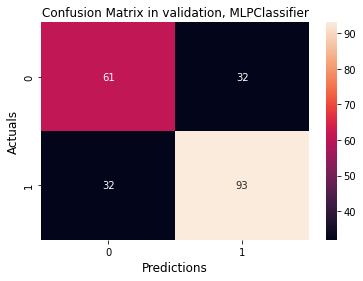

In [ ]:

                                                                                       
                                                                                       
#                                                              ,--,                                       ___               
#                                           ,---.            ,--.'|     ,--,         ,---,              ,--.'|_             
#                                          /__./|            |  | :   ,--.'|       ,---.'|              |  | :,'            
#                                     ,---.;  ; |            :  : '   |  |,        |   | :              :  : ' :            
#                                    /___/ \  | |   ,--.--.  |  ' |   `--'_        |   | |   ,--.--.  .;__,'  /     ,---.   
#                                    \   ;  \ ' |  /       \ '  | |   ,' ,'|     ,--.__| |  /       \ |  |   |     /     \  
#                                     \   \  \: | .--.  .-. ||  | :   '  | |    /   ,'   | .--.  .-. |:__,'| :    /    /  | 
#                                      ;   \  ' .  \__\/: . .'  : |__ |  | :   .   '  /  |  \__\/: . .  '  : |__ .    ' / | 
#                                       \   \   '  ," .--.; ||  | '.'|'  : |__ '   ; |:  |  ," .--.; |  |  | '.'|'   ;   /| 
#                                        \   `  ; /  /  ,.  |;  :    ;|  | '.'||   | '/  ' /  /  ,.  |  ;  :    ;'   |  / | 
#                                         :   \ |;  :   .'   \  ,   / ;  :    ;|   :    :|;  :   .'   \ |  ,   / |   :    | 
#                                          '---" |  ,     .-./---`-'  |  ,   /  \   \  /  |  ,     .-./  ---`-'   \   \  /  
#                                                 `--`---'             ---`-'    `----'    `--`---'                `----'   

# Evaluation of Model PERFORMANCE in the test dataset

# first we make predictions on the test dataset using the trained ML model:
#predictions = rf_fit.best_estimator_.predict(X_test)
predictions = rf_fit.predict(X_test)
# we calculate accuracy, precision, recall and show the confusion matrix:

com = confusion_matrix(Y_test,predictions)
sns.heatmap(com,annot=True,fmt="d")
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix in validation, '+clf.__class__.__name__, fontsize=12)

print('Accuracy: %.3f' % accuracy_score(Y_test,predictions))
print('Precision: %.3f' % precision_score(Y_test, predictions))
print('Recall (also termed sensitivity): %.3f' % recall_score(Y_test, predictions))
print('Specificity (=recall of negative): %.3f' % recall_score(Y_test, predictions,pos_label=0))

In [ ]:
#ROC and AUC 
# For ROC curve, we need to convert the output of thw binary classifier into a continuous variable. Some ML models allow to calculate the probability of positivity:
if clf.__class__.__name__!='SVC' and clf.__class__.__name__!='MLPClassifier':
  y_prob = rf_fit.best_estimator_.predict_proba(X_test)
  y_sorted = np.unique(Y)
  indices = np.argmax(y_prob, axis=1)
  # Get the label for each sample
  y_pred = y_sorted[indices]

  y_prob[:,0]
  #graph of ROC (true positive vs false positive for decreasing threshold for discrimination)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob[:,1])
  roc_auc = auc(false_positive_rate, true_positive_rate)

  plt.figure(figsize=(10,10));plt.title('Receiver Operating Characteristic, '+clf.__class__.__name__)
  plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],linestyle='--')
  plt.axis('tight');plt.ylabel('True Positive Rate');plt.xlabel('False Positive Rate')

In [ ]:
#
#                                      _       _                           _        _       
#                                     (_)     | |                         | |      | |      
#                                      _ _ __ | |_ ___ _ __ _ __  _ __ ___| |_ __ _| |_ ___ 
#                                     | | '_ \| __/ _ \ '__| '_ \| '__/ _ \ __/ _` | __/ _ \
#                                     | | | | | ||  __/ |  | |_) | | |  __/ || (_| | ||  __/
#                                     |_|_| |_|\__\___|_|  | .__/|_|  \___|\__\__,_|\__\___|
#                                                          | |                              
#                                                          |_|                              

# ML MODEL INTERPRETABILITY
# which are the features selected by the FS for modelling?  

feature_idx =search.best_estimator_.named_steps["FS"].get_support()
feature_name = X_train.columns[feature_idx]
print(feature_name)

# let's sort the features according to their importance in the model. Note that only some ML models allow importance estimation, among these all decision trees models.  

if clf.__class__.__name__!='SVC' and clf.__class__.__name__!='MLPClassifier':

# graph of feature importance
  sorted_idx = search.best_estimator_.named_steps["clf"].feature_importances_.argsort()
  plt.barh(feature_name[sorted_idx], search.best_estimator_.named_steps["clf"].feature_importances_[sorted_idx])
  plt.xlabel("Feature Importance");

Index(['concave points_mean', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


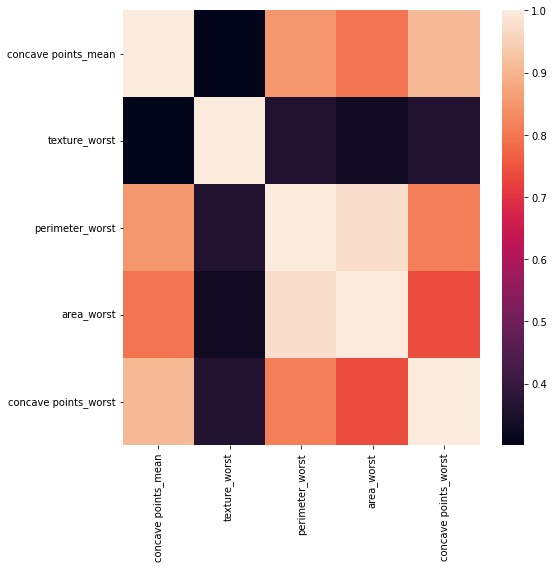

In [ ]:
# let's check the correlation among selected features

df = pd.DataFrame(X_train,columns=feature_name)
fig = plt.figure(figsize=(8, 8))
dataplot=sns.heatmap(df.corr())
plt.show()

In [ ]:
# are the selected features correlated with the outcome?
# we use the Wilcoxon rank-sum test to assess if the features are different between positives and negatives

import scipy.stats as stats
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
stats.mannwhitneyu(df[Y_train==0], df[Y_train==1])

MannwhitneyuResult(statistic=array([ 1954. , 13607.5,  1827.5,  2233. ,  2156. ]), pvalue=array([1.66647690e-73, 9.10424135e-28, 3.99947207e-74, 3.80276078e-72,
       1.60776101e-72]))

In [ ]:
# If the model used is a decision tree, why not showing the obtained tree?

if clf.__class__.__name__=='DecisionTreeClassifier':
  from sklearn import tree
  fig = plt.figure(figsize=(25,20))
  fig = plt.figure(figsize=(25,20))
  _ = tree.plot_tree(search.best_estimator_.named_steps["clf"], 
                   feature_names=feature_name,  
                   #class_names=iris.target_names,
                   filled=True)

  fig.savefig("decistion_tree.png")



In [ ]:
#
#           ,-----.      ___    _ ,---------. .-------.   ___    _ ,---------.  
#         .'  .-,  '.  .'   |  | |\          \\  _(`)_ \.'   |  | |\          \ 
#        / ,-.|  \ _ \ |   .'  | | `--.  ,---'| (_ o._)||   .'  | | `--.  ,---' 
#       ;  \  '_ /  | :.'  '_  | |    |   \   |  (_,_) /.'  '_  | |    |   \    
#       |  _`,/ \ _/  |'   ( \.-.|    :_ _:   |   '-.-' '   ( \.-.|    :_ _:    
#       : (  '\_/ \   ;' (`. _` /|    (_I_)   |   |     ' (`. _` /|    (_I_)    
#        \ `"/  \  ) / | (_ (_) _)   (_(=)_)  |   |     | (_ (_) _)   (_(=)_)   
#         '. \_/``".'   \ /  . \ /    (_I_)   /   )      \ /  . \ /    (_I_)    
#           '-----'      ``-'`-''     '---'   `---'       ``-'`-''     '---'    
                                                                        



# Prepare report on Google Sheet

# write your name or nome de plume and email: 
myname='Maja Vojnic Kortmis, maja.vojnickortmis@gmail.com'
# write some note if you wish
mynotes='MLP classifier'

#---------------------------------------------------------------------------------

from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
# dd/mm/YY H:M:S

res_string=[]
res_string.append(now.strftime("%d/%m/%Y %H:%M:%S"))
res_string.append('%.3f'% (t2/60-t1/60)) 
res_string.append('%.3f'% accuracy_score(Y_test,predictions))
res_string.append('%.3f'% recall_score(Y_test, predictions)) #res_string.append('Recall (also termed sensitivity): %.3f' % recall_score(Y_test, predictions))
res_string.append('%.3f'% recall_score(Y_test, predictions,pos_label=0)) #res_string.append('Specificity (=recall of negative): %.3f' % recall_score(Y_test, predictions,pos_label=0))
res_string.append(str(pipe.steps)) #pipeline
res_string.append(str(search.best_params_))
res_string.append(stringSMOTE)
res_string.append(myname)
res_string.append(mynotes)

sht = gc.open_by_url('https://docs.google.com/spreadsheets/d/1lEOCQHOmD3RXbkS0kQbfZ7oDytiCrLsR_NjGPjYMBbU/edit?usp=sharing')
sht2=sht.worksheet(dataset+'Results')

rows = sht2.get_all_values()
cell_list = sht2.range(('A'+str(int(np.size(rows)/np.size(res_string))+1))+':'+('J'+str(int(np.size(rows)/np.size(res_string))+1)))

for index, cell in enumerate(cell_list):               #for cell in cell_list
  cell.value = res_string[index] #random.randint(1, 10)
sht2.update_cells(cell_list)

{'spreadsheetId': '1lEOCQHOmD3RXbkS0kQbfZ7oDytiCrLsR_NjGPjYMBbU',
 'updatedRange': 'WisconsinResults!A6:J6',
 'updatedRows': 1,
 'updatedColumns': 10,
 'updatedCells': 10}